## Downloading Genome CDS Files

I used the NCBI command prompt to download all CDS files corresponding to the Basic genome dataset. Initially, there were approximately 4636 genomes in the dataset. However, after downloading, I found that I could only obtain 4619 genome CDS files.



In [16]:
import pandas as pd
import numpy as np

In [2]:
metadata = pd.read_csv("basic_cds_metadata.csv")

/local/scratch/ipykernel_87046/2994763810.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("basic_cds_metadata.csv")


### I have about 8m  CDS sequences 



In [3]:
metadata

,ref_seq_id,seq_name,locus_tag,db_xref,protein,protein_id,location,gbkey,gene,pseudo,partial,exception,sequence
0,GCF_000855445.1,lcl|NC_001990.1_cds_NP_048059.1_1,Ncbvgp1,GeneID:1450472,RNA-dependent RNA polymerase,NP_048059.1,93..5870,CDS,NaN,NaN,NaN,NaN,NaN
1,GCF_000855445.1,lcl|NC_001990.1_cds_NP_048060.1_2,Ncbvgp2,GeneID:1450471,capsid protein,NP_048060.1,4039..5877,CDS,NaN,NaN,NaN,NaN,NaN
2,GCF_013426305.1,lcl|NC_055852.1_cds_YP_010108818.1_1,KNV10_gp01,GeneID:65127179,phosphoribosyl-ATP pyrophosphohydrolase,YP_010108818.1,complement(1..384),CDS,NaN,NaN,NaN,NaN,NaN
3,GCF_013426305.1,lcl|NC_055852.1_cds_YP_010108819.1_2,KNV10_gp02,GeneID:65127089,DNA transfer protein,YP_010108819.1,complement(375..1964),CDS,NaN,NaN,NaN,NaN,NaN
4,GCF_013426305.1,lcl|NC_055852.1_cds_YP_010108820.1_3,KNV10_gp03,GeneID:65127090,hypothetical protein,YP_010108820.1,complement(1954..2184),CDS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056489,GCF_003006155.1,lcl|NZ_CP023559.1_cds_WP_106420504.1_4252,CN538_RS19630,NaN,hypothetical protein,WP_106420504.1,complement(4273222..4273782),CDS,NaN,NaN,NaN,NaN,NaN
8056490,GCF_003006155.1,lcl|NZ_CP023559.1_cds_WP_106420505.1_4253,CN538_RS19635,NaN,hypothetical protein,WP_106420505.1,complement(4273970..4274218),CDS,NaN,NaN,NaN,NaN,NaN
8056491,GCF_003006155.1,lcl|NZ_CP023559.1_cds_WP_242495413.1_4254,CN538_RS19640,NaN,hypothetical protein,WP_242495413.1,complement(4274282..4275283),CDS,NaN,NaN,NaN,NaN,NaN
8056492,GCF_003006155.1,lcl|NZ_CP023559.1_cds_WP_106420506.1_4255,CN538_RS19645,NaN,hypothetical protein,WP_106420506.1,complement(4275283..4275663),CDS,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Number of unique genes:", len(metadata["gene"].unique()))
print("Number of unique genus:", len(metadata["ref_seq_id"].unique()))


Number of unique genes: 65117
Number of unique genus: 4619


In [5]:
metadata["gene"].value_counts()

gene
trxA       3193
lepB       2980
tuf        2952
lpdA       2942
map        2867
           ... 
Kyn1          1
PGM           1
GTF2401       1
ARP2402       1
CYP-39        1
Name: count, Length: 65116, dtype: int64

# Filteration 

## First and Second Filtration: Removing hypothetical protein labels and uncharacterized protein


In [6]:
# First filter: Remove rows where protein is "hypothetical protein"
metadata = metadata[metadata["protein"] != "hypothetical protein"]

# Print number of sequences and number of unique genes after the first filtration
print("After removing 'hypothetical protein':")
print("Number of sequences:", len(metadata))
print("Number of unique genes:", len(metadata["gene"].unique()))
print("Number of unique genus:", len(metadata["ref_seq_id"].unique()))

# Second filter: Remove rows where protein is "uncharacterized protein"
metadata = metadata[metadata["protein"] != "uncharacterized protein"]

# Print number of sequences and number of unique genes after the second filtration
print("\nAfter removing 'uncharacterized protein':")
print("Number of sequences:", len(metadata))
print("Number of unique genes:", len(metadata["gene"].unique()))
print("Number of unique genus:", len(metadata["ref_seq_id"].unique()))


After removing 'hypothetical protein':
Number of sequences: 6564485
Number of unique genes: 40752
Number of unique genus: 4584

After removing 'uncharacterized protein':
Number of sequences: 6428715
Number of unique genes: 40704
Number of unique genus: 4579


In [7]:
metadata

,ref_seq_id,seq_name,locus_tag,db_xref,protein,protein_id,location,gbkey,gene,pseudo,partial,exception,sequence
0,GCF_000855445.1,lcl|NC_001990.1_cds_NP_048059.1_1,Ncbvgp1,GeneID:1450472,RNA-dependent RNA polymerase,NP_048059.1,93..5870,CDS,NaN,NaN,NaN,NaN,NaN
1,GCF_000855445.1,lcl|NC_001990.1_cds_NP_048060.1_2,Ncbvgp2,GeneID:1450471,capsid protein,NP_048060.1,4039..5877,CDS,NaN,NaN,NaN,NaN,NaN
2,GCF_013426305.1,lcl|NC_055852.1_cds_YP_010108818.1_1,KNV10_gp01,GeneID:65127179,phosphoribosyl-ATP pyrophosphohydrolase,YP_010108818.1,complement(1..384),CDS,NaN,NaN,NaN,NaN,NaN
3,GCF_013426305.1,lcl|NC_055852.1_cds_YP_010108819.1_2,KNV10_gp02,GeneID:65127089,DNA transfer protein,YP_010108819.1,complement(375..1964),CDS,NaN,NaN,NaN,NaN,NaN
5,GCF_013426305.1,lcl|NC_055852.1_cds_YP_010108821.1_4,KNV10_gp04,GeneID:65127091,protein of unknown function DUF1064,YP_010108821.1,complement(2194..2556),CDS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056484,GCF_003006155.1,lcl|NZ_CP023559.1_cds_WP_277985055.1_4247,CN538_RS19605,NaN,rod shape-determining protein MreC,WP_277985055.1,complement(4267577..4268548),CDS,mreC,NaN,NaN,NaN,NaN
8056485,GCF_003006155.1,lcl|NZ_CP023559.1_cds_WP_035473851.1_4248,CN538_RS19610,NaN,rod shape-determining protein,WP_035473851.1,complement(4268600..4269637),CDS,NaN,NaN,NaN,NaN,NaN
8056486,GCF_003006155.1,lcl|NZ_CP023559.1_cds_WP_106420502.1_4249,CN538_RS19615,NaN,Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase s...,WP_106420502.1,4269830..4270120,CDS,gatC,NaN,NaN,NaN,NaN
8056487,GCF_003006155.1,lcl|NZ_CP023559.1_cds_CN538_RS19620_4250,CN538_RS19620,NaN,Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase s...,NaN,4270212..4271677,CDS,gatA,True,NaN,NaN,NaN


In [8]:
metadata['ref_seq_id_copy']=metadata['ref_seq_id']
metadata[['ref_seq_id',"tag_id"]] = metadata['ref_seq_id'].str.split('.', expand=True)
metadata['ref_seq_id'] = metadata['ref_seq_id'].str.replace('GCF_', 'G')


In [9]:
# Read lineage file to obtain taxonomic information
taxa = pd.read_csv("../lineage.csv")


In [10]:
merged_df = pd.merge(metadata, taxa, on='ref_seq_id', how='left')

In [11]:
merged_df

,ref_seq_id,seq_name,locus_tag,db_xref,protein,protein_id,location,gbkey,gene,pseudo,...,sequence,ref_seq_id_copy,tag_id,kingdom,phylum,class,order,family,genus,species
0,G000855445,lcl|NC_001990.1_cds_NP_048059.1_1,Ncbvgp1,GeneID:1450472,RNA-dependent RNA polymerase,NP_048059.1,93..5870,CDS,NaN,NaN,...,NaN,GCF_000855445.1,1,Orthornavirae,Kitrinoviricota,Alsuviricetes,Hepelivirales,Alphatetraviridae,Betatetravirus,Nudaurelia capensis beta virus
1,G000855445,lcl|NC_001990.1_cds_NP_048060.1_2,Ncbvgp2,GeneID:1450471,capsid protein,NP_048060.1,4039..5877,CDS,NaN,NaN,...,NaN,GCF_000855445.1,1,Orthornavirae,Kitrinoviricota,Alsuviricetes,Hepelivirales,Alphatetraviridae,Betatetravirus,Nudaurelia capensis beta virus
2,G013426305,lcl|NC_055852.1_cds_YP_010108818.1_1,KNV10_gp01,GeneID:65127179,phosphoribosyl-ATP pyrophosphohydrolase,YP_010108818.1,complement(1..384),CDS,NaN,NaN,...,NaN,GCF_013426305.1,1,Heunggongvirae,Uroviricota,Caudoviricetes,,,Elemovirus,Elemovirus elemoA
3,G013426305,lcl|NC_055852.1_cds_YP_010108819.1_2,KNV10_gp02,GeneID:65127089,DNA transfer protein,YP_010108819.1,complement(375..1964),CDS,NaN,NaN,...,NaN,GCF_013426305.1,1,Heunggongvirae,Uroviricota,Caudoviricetes,,,Elemovirus,Elemovirus elemoA
4,G013426305,lcl|NC_055852.1_cds_YP_010108821.1_4,KNV10_gp04,GeneID:65127091,protein of unknown function DUF1064,YP_010108821.1,complement(2194..2556),CDS,NaN,NaN,...,NaN,GCF_013426305.1,1,Heunggongvirae,Uroviricota,Caudoviricetes,,,Elemovirus,Elemovirus elemoA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428710,G003006155,lcl|NZ_CP023559.1_cds_WP_277985055.1_4247,CN538_RS19605,NaN,rod shape-determining protein MreC,WP_277985055.1,complement(4267577..4268548),CDS,mreC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
6428711,G003006155,lcl|NZ_CP023559.1_cds_WP_035473851.1_4248,CN538_RS19610,NaN,rod shape-determining protein,WP_035473851.1,complement(4268600..4269637),CDS,NaN,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
6428712,G003006155,lcl|NZ_CP023559.1_cds_WP_106420502.1_4249,CN538_RS19615,NaN,Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase s...,WP_106420502.1,4269830..4270120,CDS,gatC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
6428713,G003006155,lcl|NZ_CP023559.1_cds_CN538_RS19620_4250,CN538_RS19620,NaN,Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase s...,NaN,4270212..4271677,CDS,gatA,True,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis


In [12]:
merged_df["kingdom"].fillna('', inplace=True)


/local/scratch/ipykernel_87046/4230797076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["kingdom"].fillna('', inplace=True)


In [13]:
merged_df["kingdom"].value_counts()

kingdom
Bacteria          5774508
Archaea            290915
Fungi              171573
Eukaryota          118848
Heunggongvirae      59496
Bamfordvirae         7110
Orthornavirae        3310
Viruses              1775
Shotokuvirae          641
Zilligvirae           155
Loebvirae             153
Pararnavirae           94
Helvetiavirae          82
Sangervirae            38
Trapavirae             17
Name: count, dtype: int64

## Third Filtration: Removing rows with unknown gene labels


In [17]:
merged_df.replace(['', ' ', 'NULL', 'NaN', 'nan'], np.nan, inplace=True)

merged_df.dropna(subset=["ref_seq_id","seq_name","protein_id","gene","kingdom","phylum","class","order","family","genus"], inplace=True)

# Print number of sequences and number of unique genes after the second filtration
print("\nAfter removing Nan gene")
print("Number of sequences:", len(merged_df))
print("Number of unique genes:", len(merged_df["gene"].unique()))
print("Number of unique genus:", len(merged_df["genus"].unique()))


After removing Nan gene
Number of sequences: 1363222
Number of unique genes: 37578
Number of unique genus: 2712


In [18]:
print("Number of unique kingdom:", len(merged_df["kingdom"].unique()))

print("Number of unique phylum:", len(merged_df["phylum"].unique()))
print("Number of unique genus:", len(merged_df["genus"].unique()))

Number of unique kingdom: 13
Number of unique phylum: 74
Number of unique genus: 2712


In [19]:
merged_df["gene"].value_counts()

gene
trxA               3054
lepB               2851
lpdA               2814
tuf                2765
map                2730
                   ... 
SRR6960799_29_2       1
SRR6960799_29_3       1
ctpM                  1
Gerhypos.2_24_1       1
Gerhypos.2_24_3       1
Name: count, Length: 37578, dtype: int64

In [ ]:
merged_df["phylum"].value_counts()

## Considering only genes of bacteria and archaea

In [20]:
merged_df=merged_df[(merged_df.kingdom=="Bacteria") | (merged_df.kingdom=="Archaea")]         

print("Number of unique kingdom:", len(merged_df["kingdom"].unique()))
print("Number of unique phylum:", len(merged_df["phylum"].unique()))
print("Number of unique genus:", len(merged_df["genus"].unique()))
print("Number of unique gene:", len(merged_df["gene"].unique()))

Number of unique kingdom: 2
Number of unique phylum: 51
Number of unique genus: 1968
Number of unique gene: 13794


In [21]:
merged_df

,ref_seq_id,seq_name,locus_tag,db_xref,protein,protein_id,location,gbkey,gene,pseudo,...,sequence,ref_seq_id_copy,tag_id,kingdom,phylum,class,order,family,genus,species
69,G902729405,lcl|NZ_LR746496.1_cds_WP_240983200.1_1,MNU25_RS00005,NaN,50S ribosomal protein L11 methyltransferase,WP_240983200.1,complement(<1..837),CDS,prmA,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
70,G902729405,lcl|NZ_LR746496.1_cds_WP_240983201.1_2,MNU25_RS00010,NaN,molecular chaperone DnaJ,WP_240983201.1,complement(862..1989),CDS,dnaJ,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
71,G902729405,lcl|NZ_LR746496.1_cds_WP_240983202.1_3,MNU25_RS00015,NaN,molecular chaperone DnaK,WP_240983202.1,complement(2482..4329),CDS,dnaK,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
73,G902729405,lcl|NZ_LR746496.1_cds_WP_240983203.1_5,MNU25_RS00025,NaN,heat-inducible transcriptional repressor HrcA,WP_240983203.1,complement(5175..6212),CDS,hrcA,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
74,G902729405,lcl|NZ_LR746496.1_cds_WP_240983204.1_6,MNU25_RS00030,NaN,radical SAM family heme chaperone HemW,WP_240983204.1,complement(6462..7694),CDS,hemW,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428698,G003006155,lcl|NZ_CP023559.1_cds_WP_106420724.1_4233,CN538_RS19545,NaN,PTS IIA-like nitrogen regulatory protein PtsN,WP_106420724.1,4253906..4254385,CDS,ptsN,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
6428704,G003006155,lcl|NZ_CP023559.1_cds_WP_106420497.1_4240,CN538_RS19575,NaN,metalloprotease TldD,WP_106420497.1,complement(4259198..4260652),CDS,tldD,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
6428710,G003006155,lcl|NZ_CP023559.1_cds_WP_277985055.1_4247,CN538_RS19605,NaN,rod shape-determining protein MreC,WP_277985055.1,complement(4267577..4268548),CDS,mreC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
6428712,G003006155,lcl|NZ_CP023559.1_cds_WP_106420502.1_4249,CN538_RS19615,NaN,Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase s...,WP_106420502.1,4269830..4270120,CDS,gatC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis


## Considering only genes that have one sample in genome we have some issue with Hungatella hathewayi,  genomes I think it is better to remove those genes and only cosider those gene has one sample

In [22]:
# Assuming metadata is your DataFrame and you want to filter based on 'gene' and 'genus' columns

# Group by 'gene' and 'genus' and count occurrences
counts = merged_df.groupby(["gene", "genus"]).size().reset_index(name='count')

# Filter only the rows where count is equal to 1 (indicating unique occurrences)
unique_counts = counts[counts['count'] == 1]

# Merge the unique counts DataFrame back to the original DataFrame to filter out rows with duplicate occurrences
merged_df = merged_df.merge(unique_counts[['gene', 'genus']], on=['gene', 'genus'], how='inner')

# filtered_merged_df will now contain only the rows where the combination of 'gene' and 'genus' occurs only once.


In [24]:

print("Number of unique kingdom:", len(merged_df["kingdom"].unique()))
print("Number of unique phylum:", len(merged_df["phylum"].unique()))
print("Number of unique genus:", len(merged_df["genus"].unique()))
print("Number of unique gene:", len(merged_df["gene"].unique()))

Number of unique kingdom: 2
Number of unique phylum: 51
Number of unique genus: 1968
Number of unique gene: 13724


In [25]:
merged_df

,ref_seq_id,seq_name,locus_tag,db_xref,protein,protein_id,location,gbkey,gene,pseudo,...,sequence,ref_seq_id_copy,tag_id,kingdom,phylum,class,order,family,genus,species
0,G902729405,lcl|NZ_LR746496.1_cds_WP_240983200.1_1,MNU25_RS00005,NaN,50S ribosomal protein L11 methyltransferase,WP_240983200.1,complement(<1..837),CDS,prmA,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
1,G902729405,lcl|NZ_LR746496.1_cds_WP_240983201.1_2,MNU25_RS00010,NaN,molecular chaperone DnaJ,WP_240983201.1,complement(862..1989),CDS,dnaJ,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
2,G902729405,lcl|NZ_LR746496.1_cds_WP_240983202.1_3,MNU25_RS00015,NaN,molecular chaperone DnaK,WP_240983202.1,complement(2482..4329),CDS,dnaK,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
3,G902729405,lcl|NZ_LR746496.1_cds_WP_240983203.1_5,MNU25_RS00025,NaN,heat-inducible transcriptional repressor HrcA,WP_240983203.1,complement(5175..6212),CDS,hrcA,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
4,G902729405,lcl|NZ_LR746496.1_cds_WP_240983204.1_6,MNU25_RS00030,NaN,radical SAM family heme chaperone HemW,WP_240983204.1,complement(6462..7694),CDS,hemW,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177583,G003006155,lcl|NZ_CP023559.1_cds_WP_106420724.1_4233,CN538_RS19545,NaN,PTS IIA-like nitrogen regulatory protein PtsN,WP_106420724.1,4253906..4254385,CDS,ptsN,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
1177584,G003006155,lcl|NZ_CP023559.1_cds_WP_106420497.1_4240,CN538_RS19575,NaN,metalloprotease TldD,WP_106420497.1,complement(4259198..4260652),CDS,tldD,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
1177585,G003006155,lcl|NZ_CP023559.1_cds_WP_277985055.1_4247,CN538_RS19605,NaN,rod shape-determining protein MreC,WP_277985055.1,complement(4267577..4268548),CDS,mreC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
1177586,G003006155,lcl|NZ_CP023559.1_cds_WP_106420502.1_4249,CN538_RS19615,NaN,Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase s...,WP_106420502.1,4269830..4270120,CDS,gatC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis


####  10th Filtration: Removing all genes that occur in less than 1000 different gener

In [27]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm


# Generate combinations of 10 genes
gene_combinations = list(itertools.combinations(merged_df['gene'].unique(), 1))

# Create an empty DataFrame to store the results
data_list=[]
# Iterate through each combination and find the corresponding genus
for combination in tqdm(gene_combinations):
    genes_in_combination = list(combination)
    genus_for_combination = merged_df.loc[merged_df['gene'].isin(genes_in_combination), 'genus'].unique()
    data_list.append({'Gene_Combination': genes_in_combination, 'Genus': genus_for_combination})
    

# Create the DataFrame from the list
result_df = pd.DataFrame(data_list)

# Count the occurrences of each genus in the entire dataset
result_df["count"] = result_df['Genus'].apply(lambda x : len(x))
result_df['Gene']=result_df['Gene_Combination'].apply(lambda x : ''.join(x))




 20%|█████████████████████████████████████████▋                                                                                                                                                                     | 2764/13724 [00:54<03:37, 50.36it/s]

KeyboardInterrupt



In [185]:
result_df = result_df.sort_values(by='count')

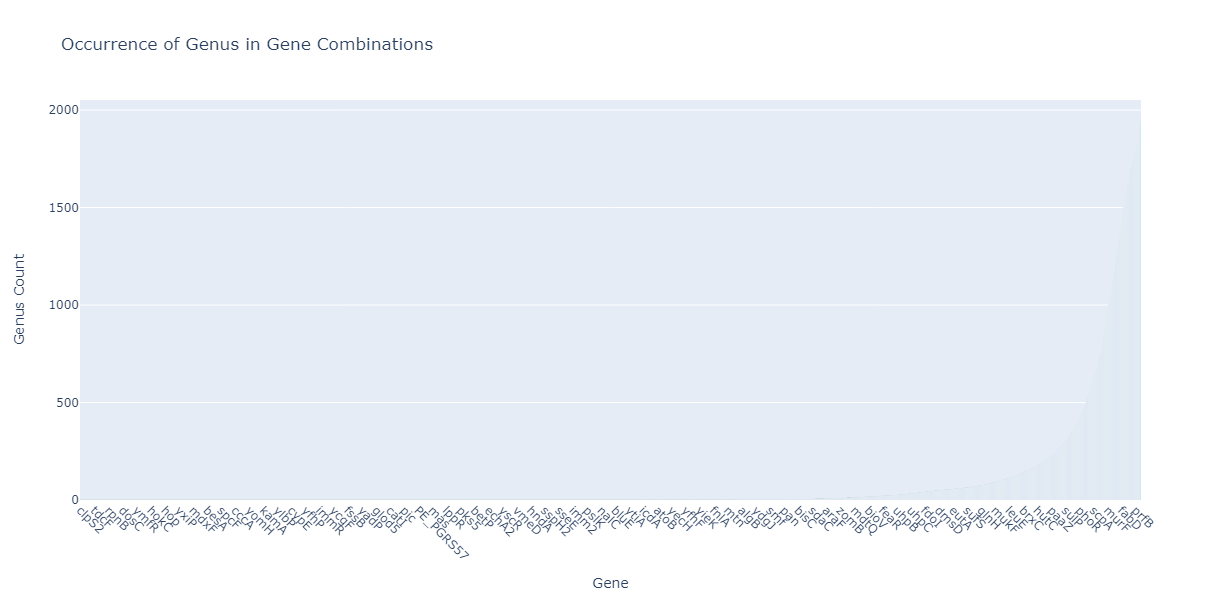

In [186]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

# Assuming result_df is your DataFrame with 'Gene' and 'count' columns

# Create a bar plot with plotly
fig = px.bar(result_df, x='Gene', y='count', title='Occurrence of Genus in Gene Combinations ',
             labels={'Gene': 'Gene', 'count': 'Genus Count'}, width=1200, height=600,
             color_discrete_sequence=['green'])

# Customize font and title
fig.update_layout(font=dict(size=12))
fig.update_xaxes(tickangle=45)

# Save the plot
pio.write_html(fig, file="gene_genus_count_test.html")

# If you want to save as an image
# pio.write_image(fig, "gene_genus_count_test.png")

# Display the plot
fig.show()


In [201]:

result_df_1000 = result_df[result_df['count'] >= 500]
# result_df_1000 = result_df[(result_df['count'] >= 1700) & (result_df['count'] <= 1800)]

result_df_1000 = result_df_1000.sort_values(by='count')


In [202]:
result_df_1000

,Gene_Combination,Genus,count,Gene
652,[cdd],"[ Acididesulfobacillus, Yersinia, Cedecea, ...",501,cdd
388,[larB],"[ Acididesulfobacillus, Pleurocapsa, Candida...",504,larB
987,[rnd],"[ Bermanella, Yersinia, Cedecea, Xylella, ...",505,rnd
1828,[putA],"[ Yersinia, Cedecea, Citromicrobium, Variib...",505,putA
1427,[aceA],"[ Yersinia, Pleurocapsa, Cedecea, Thermobif...",505,aceA
...,...,...,...,...
112,[serS],"[ Acididesulfobacillus, Bermanella, Yersinia...",1918,serS
194,[rpmC],"[ Acididesulfobacillus, Bermanella, Yersinia...",1921,rpmC
504,[infB],"[ Acididesulfobacillus, Bermanella, Yersinia...",1926,infB
205,[secY],"[ Acididesulfobacillus, Bermanella, Yersinia...",1935,secY


In [203]:
filtered_metadata =merged_df[merged_df["gene"].isin(list(result_df_1000['Gene']))]

In [204]:
filtered_metadata

,ref_seq_id,seq_name,locus_tag,db_xref,protein,protein_id,location,gbkey,gene,pseudo,...,sequence,ref_seq_id_copy,tag_id,kingdom,phylum,class,order,family,genus,species
0,G902729405,lcl|NZ_LR746496.1_cds_WP_240983200.1_1,MNU25_RS00005,NaN,50S ribosomal protein L11 methyltransferase,WP_240983200.1,complement(<1..837),CDS,prmA,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
1,G902729405,lcl|NZ_LR746496.1_cds_WP_240983201.1_2,MNU25_RS00010,NaN,molecular chaperone DnaJ,WP_240983201.1,complement(862..1989),CDS,dnaJ,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
2,G902729405,lcl|NZ_LR746496.1_cds_WP_240983202.1_3,MNU25_RS00015,NaN,molecular chaperone DnaK,WP_240983202.1,complement(2482..4329),CDS,dnaK,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
3,G902729405,lcl|NZ_LR746496.1_cds_WP_240983203.1_5,MNU25_RS00025,NaN,heat-inducible transcriptional repressor HrcA,WP_240983203.1,complement(5175..6212),CDS,hrcA,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
4,G902729405,lcl|NZ_LR746496.1_cds_WP_240983204.1_6,MNU25_RS00030,NaN,radical SAM family heme chaperone HemW,WP_240983204.1,complement(6462..7694),CDS,hemW,NaN,...,NaN,GCF_902729405.1,1,Bacteria,Bacillota,Clostridia,Eubacteriales,Peptococcaceae,Acididesulfobacillus,Acididesulfobacillus acetoxydans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177582,G003006155,lcl|NZ_CP023559.1_cds_WP_106420496.1_4232,CN538_RS19540,NaN,ribosome-associated translation inhibitor RaiA,WP_106420496.1,4253587..4253895,CDS,raiA,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
1177584,G003006155,lcl|NZ_CP023559.1_cds_WP_106420497.1_4240,CN538_RS19575,NaN,metalloprotease TldD,WP_106420497.1,complement(4259198..4260652),CDS,tldD,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
1177585,G003006155,lcl|NZ_CP023559.1_cds_WP_277985055.1_4247,CN538_RS19605,NaN,rod shape-determining protein MreC,WP_277985055.1,complement(4267577..4268548),CDS,mreC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis
1177586,G003006155,lcl|NZ_CP023559.1_cds_WP_106420502.1_4249,CN538_RS19615,NaN,Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase s...,WP_106420502.1,4269830..4270120,CDS,gatC,NaN,...,NaN,GCF_003006155.1,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Salinicola,Salinicola tamaricis


/tmp/ipykernel_57535/280685594.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




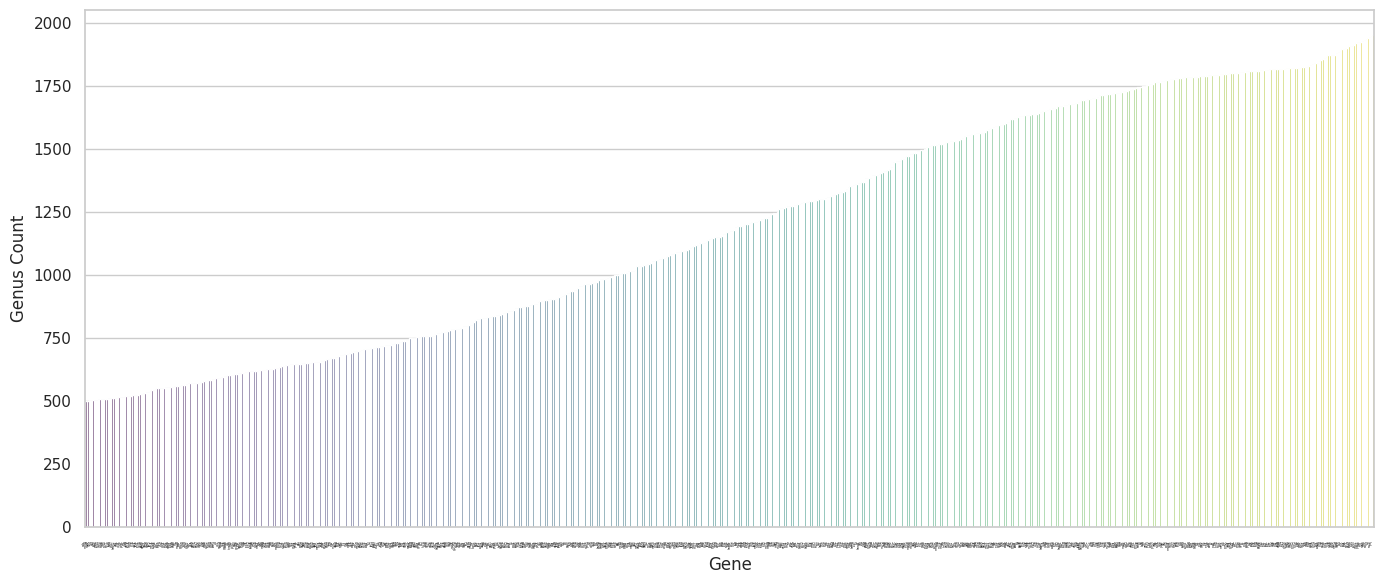

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Create a bar plot with seaborn
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x=result_df_1000['Gene'], y=result_df_1000['count'], palette="viridis")

# Customize plot labels and title
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Genus Count', fontsize=12)
# plt.title('Occurrence of Genus in Gene Combinations (Count > 1800)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=2)
# Display the plot
plt.tight_layout()
plt.savefig("gene_genus_count_test.pdf",dpi=300)

plt.show()

In [157]:
filtered_metadata.shape

(940926, 22)

In [156]:

filtered_metadata.groupby(["gene","genus"]).count().sort_values(by="phylum")

ref_seq_id  seq_name  locus_tag  db_xref  protein  \
gene genus                                                                    
rfbB Methylogaea                   1         1          1        0        1   
     Methanothermococcus           1         1          1        1        1   
     Methanothermus                1         1          1        1        1   
     Methanothrix                  1         1          1        1        1   
     Methanotorris                 1         1          1        1        1   
...                              ...       ...        ...      ...      ...   
ugpC Martelella                   32        32         32        0       32   
istB Globicatella                 34        34         34        0       34   
lepB Hungatella                   39        39         39        0       39   
istB Aromatoleum                  39        39         39        0       39   
     Yersinia                     46        46         46       46       46   

                          protein_id  location  gbkey  pseudo  partial  \
gene genus                                                               
rfbB Methylogaea                   1         1      1       0        0   
     Methanothermococcus           1         1      1       0        0   
     Methanothermus                1         1      1       0        0   
     Methanothrix                  1         1      1       0        0   
     Methanotorris                 1         1      1       0        0   
...                              ...       ...    ...     ...      ...   
ugpC Martelella                   32        32     32       0        0   
istB Globicatella                 34        34     34       0        0   
lepB Hungatella                   39        39     39       0        0   
istB Aromatoleum                  39        39     39       0        0   
     Yersinia                     46        46     46       0        0   

                          exception  sequence  ref_seq_id_copy  tag_id  \
gene genus                                                               
rfbB Methylogaea                  0         0                1       1   
     Methanothermococcus          0         0                1       1   
     Methanothermus               0         0                1       1   
     Methanothrix                 0         0                1       1   
     Methanotorris                0         0                1       1   
...                             ...       ...              ...     ...   
ugpC Martelella                   0         0               32      32   
istB Globicatella                 0         0               34      34   
lepB Hungatella                   0         0               39      39   
istB Aromatoleum                  0         0               39      39   
     Yersinia                     0         0               46      46   

                          kingdom  phylum  class  order  family  species  
gene genus                                                                
rfbB Methylogaea                1       1      1      1       1        1  
     Methanothermococcus        1       1      1      1       1        1  
     Methanothermus             1       1      1      1       1        1  
     Methanothrix               1       1      1      1       1        1  
     Methanotorris              1       1      1      1       1        1  
...                           ...     ...    ...    ...     ...      ...  
ugpC Martelella                32      32     32     32      32       32  
istB Globicatella              34      34     34     34      34       34  
lepB Hungatella                39      39     39     39      39       39  
istB Aromatoleum               39      39     39     39      39       39  
     Yersinia                  46      46     46     46      46       46  

[886221 rows x 20 columns]

In [158]:
filtered_metadata.phylum.value_counts()

phylum
Pseudomonadota                  414162
Bacillota                       146059
Actinomycetota                  107636
Bacteroidota                     78809
Cyanobacteriota                  30642
Thermodesulfobacteriota          28180
Planctomycetota                  24401
Euryarchaeota                    18852
Campylobacterota                  8451
Spirochaetota                     7451
Acidobacteriota                   6844
Verrucomicrobiota                 6251
Myxococcota                       5261
Thermotogota                      4541
Chloroflexota                     4417
Synergistota                      4001
Mycoplasmatota                    3649
Aquificota                        3613
Bdellovibrionota                  3444
Deinococcota                      3179
Fusobacteriota                    3155
Thermoproteota                    3035
Deferribacterota                  3007
Chlamydiota                       2515
Chlorobiota                       2434
Nitrospirota      

##  Seventh Filtration: Removing some phyla with less than 350 occurrences. I did this to minimize the number of "Candidatus" phyla.


In [56]:
# Calculate the counts of each gene
gene_counts = filtered_metadata["phylum"].value_counts()

# Select rows for genes with more than 100 samples
genes_with_more_than_350_samples = gene_counts[gene_counts > 350].index

# Filter the DataFrame based on selected genes
filtered_metadata = filtered_metadata[filtered_metadata["phylum"].isin(genes_with_more_than_350_samples)]



In [57]:
print("Number of Sequences:", len(filtered_metadata))
print("Number of unique phylum:", len(filtered_metadata["phylum"].unique()))
print("Number of unique genus:", len(filtered_metadata["genus"].unique()))
print("Number of unique gene:", len(filtered_metadata["gene"].unique()))

Number of Sequences: 800448
Number of unique phylum: 45
Number of unique genus: 2050
Number of unique gene: 497


## Eighth Filtration: Removing some genera with less than 50 occurrences. This was done to minimize the number of "Candidatus" genera.


In [61]:
# Calculate the counts of each gene
gene_counts = filtered_metadata["genus"].value_counts()

# Select rows for genes with more than 100 samples
genes_with_more_than_100_samples = gene_counts[gene_counts > 50 ].index

# Filter the DataFrame based on selected genes
filtered_metadata = filtered_metadata[filtered_metadata["genus"].isin(genes_with_more_than_100_samples)]



In [63]:
print("Number of Sequences:", len(filtered_metadata))
print("Number of unique phylum:", len(filtered_metadata["phylum"].unique()))
print("Number of unique genus:", len(filtered_metadata["genus"].unique()))
print("Number of unique gene:", len(filtered_metadata["gene"].unique()))

Number of Sequences: 800318
Number of unique phylum: 45
Number of unique genus: 2046
Number of unique gene: 497


## The following filtrations are in the triplet phase after saving the previous file


In [64]:

new_triplet = filtered_metadata[["gene","phylum","class","order","family","genus","seq_name"]]
new_triplet= new_triplet.reset_index().rename(columns={"index":"idx"})

new_triplet = new_triplet[["idx","gene","phylum","class","order","family","genus","seq_name"]]
new_triplet["idx1"]=new_triplet["idx"]

In [70]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm


# Generate combinations of 10 genes
gene_combinations = list(itertools.combinations(new_triplet['gene'].unique(), 1))

# Create an empty DataFrame to store the results
data_list=[]
# Iterate through each combination and find the corresponding genus
for combination in tqdm(gene_combinations):
    genes_in_combination = list(combination)
    genus_for_combination = new_triplet.loc[new_triplet['gene'].isin(genes_in_combination), 'genus'].unique()
    data_list.append({'Gene_Combination': genes_in_combination, 'Genus': genus_for_combination})
    

# Create the DataFrame from the list
result_df = pd.DataFrame(data_list)

# Count the occurrences of each genus in the entire dataset
result_df["count"] = result_df['Genus'].apply(lambda x : len(x))
result_df['Gene']=result_df['Gene_Combination'].apply(lambda x : ''.join(x))




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 497/497 [00:06<00:00, 73.70it/s]


In [72]:
result_df = result_df.sort_values(by='count')

/tmp/ipykernel_57535/1080704286.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=result_df['Gene'], y=result_df['count'], palette="viridis")


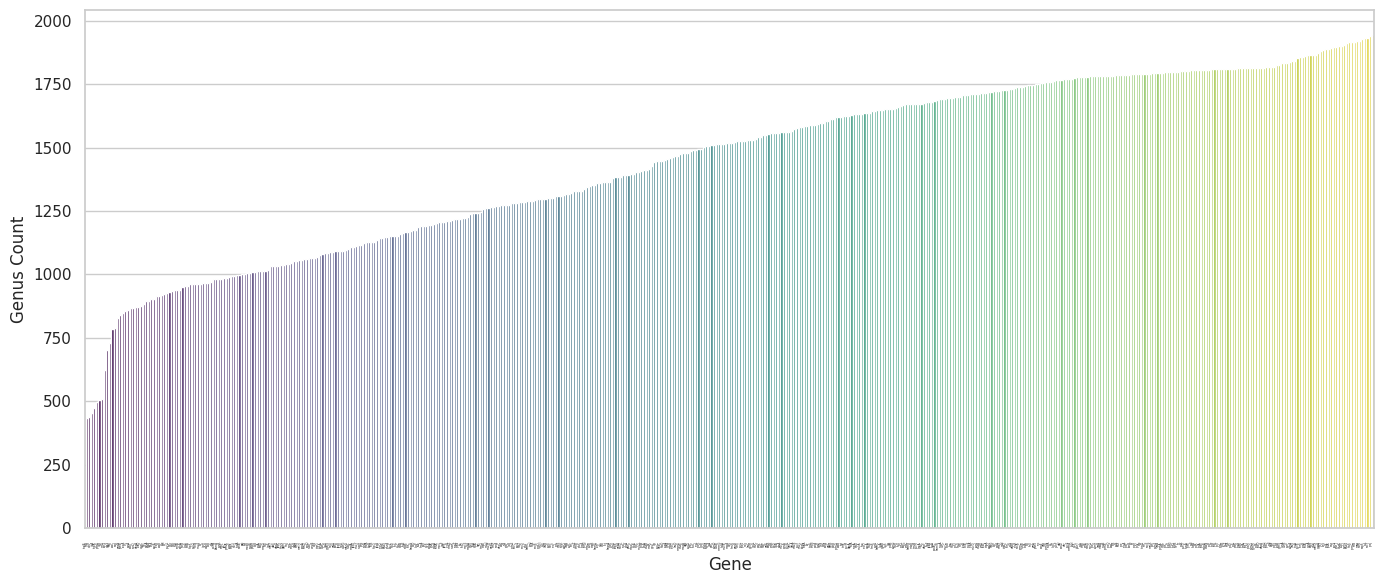

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Create a bar plot with seaborn
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x=result_df['Gene'], y=result_df['count'], palette="viridis")

# Customize plot labels and title
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Genus Count', fontsize=12)
# plt.title('Occurrence of Genus in Gene Combinations (Count > 1800)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=2)
# Display the plot
plt.tight_layout()
plt.savefig("gene_genus_count_test.pdf",dpi=300)

plt.show()

## 10th Filtration: Removing all genes that occur in less than 1000 different genera


In [78]:

result_df_1000 = result_df[result_df['count'] >= 1000]
# result_df_1000 = result_df[(result_df['count'] >= 1700) & (result_df['count'] <= 1800)]

result_df_1000 = result_df_1000.sort_values(by='count')


In [ ]:
new_triplet =new_triplet[new_triplet["gene"].isin(list(result_df_1000['Gene']))]

In [79]:
print("Number of Sequences:", len(new_triplet))
print("Number of unique phylum:", len(new_triplet["phylum"].unique()))
print("Number of unique genus:", len(new_triplet["genus"].unique()))
print("Number of unique gene:", len(new_triplet["gene"].unique()))

Number of Sequences: 770075
Number of unique phylum: 44
Number of unique genus: 1959
Number of unique gene: 497


## We used the following function to select fragments from each sequence

In [ ]:

def fragment_extractor(sequence,seq_len=400):
    sequence_list = []
    
    allowed_letters = set("ACGT") 
    sequence = ''.join(letter for letter in sequence if letter in allowed_letters)

    random.seed(int(len(sequence)/seq_len))
    for i in random.sample(range(0, len(sequence)-seq_len,50), int(len(sequence)/seq_len)):
        seqs = sequence[i:i+seq_len]
        sequence_list.append(seqs)         
     
    return sequence_list 